In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
from dateutil import parser
from google.colab import files

In [0]:
!pip install geopandas
import geopandas as gpd
!pip install Pysal
!pip install fiona
import fiona

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
downloaded = drive.CreateFile({'id':'1UQ1YKFcHbMW6y_XB6UZrGnNzkqwUUuy_'}) 
downloaded.GetContentFile('Data_16') 
d16 = pd.read_csv('Data_16')
downloaded = drive.CreateFile({'id':'1ICY28mhiCgNUhRup7onq9_0mhVShAhwB'}) 
downloaded.GetContentFile('Data_2015') 
d15 = pd.read_csv('Data_2015')
downloaded = drive.CreateFile({'id':'1zpczk7IzxGn18kT8McTPlAv0tV5xAaij'}) 
downloaded.GetContentFile('Data_2013') 
d13 = pd.read_csv('Data_2013')

In [0]:
downloaded = drive.CreateFile({'id':'1ZuTdsiOsAj6eKP1pdcph-OjgY-WmfaY4'}) 
downloaded.GetContentFile('com.geojson') 


In [0]:
#company wise revenue of 2013
c13 = d13.groupby(['Company']).agg({'Trip Total_sum': sum, 'Trip Seconds_sum': sum, 'Trip Miles_sum':sum, 'Trip Total_count':sum})
c13.columns = ["".join(x) for x in c13.columns.ravel()]
c13 = c13.reset_index()

c13 = c13.sort_values(by = ['Trip Total_sum'], ascending = False)

In [0]:
#top 5 caompanies of 2013 by revenue
t13 = c13.iloc[0:5]

In [0]:
#Taxi affiliation service community wise log median revenue info extraction and map plotting

tas13 = d13.loc[d13['Company'] == 'Taxi Affiliation Services']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2013 for Taxi Affiliation Services', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('TAS_13.png', dpi =100)
from google.colab import files
files.download( "TAS_13.png" )

In [0]:
#Dispatch Taxi community wise median revenue info extraction and map plotting

tas13 = d13.loc[d13['Company'] == 'Dispatch Taxi Affiliation']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1)
tas13_merge.head()
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2013 for Dispatch Taxi Affiliation', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('DTA_13.png', dpi =100)
from google.colab import files
files.download( "DTA_13.png" )

In [0]:
#Blue Ribbon Taxi Association Inc. community wise median revenue info extraction and map plotting

tas13 = d13.loc[d13['Company'] == 'Blue Ribbon Taxi Association Inc.']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2013 for Blue Ribbon Taxi Association Inc', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('BlueRibbon_13.png', dpi =100)
from google.colab import files
files.download( "BlueRibbon_13.png" )

In [0]:
#Choice Taxi Association community wise median revenue info extraction and map plotting

tas13 = d13.loc[d13['Company'] == 'Choice Taxi Association']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2013 for Choice Taxi Association', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('ChoiceTaxiAssociation_13.png', dpi =100)
from google.colab import files
files.download( "ChoiceTaxiAssociation_13.png" )

In [0]:
#Northwest Management LLC community wise median revenue info extraction and map plotting

tas13 = d13.loc[d13['Company'] == 'Northwest Management LLC']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2013 for Northwest Management LLC', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('NorthwestManagementLLC_13.png', dpi =100)
from google.colab import files
files.download( "NorthwestManagementLLC_13.png")

In [0]:
#Where do these companies stand in 2016


*#Where do these companies stand in 2016[link text](https://)*

In [0]:
#Taxi affiliation service community wise log median revenue info extraction and map plotting

tas13 = d16.loc[d16['Company'] == 'Taxi Affiliation Services']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2016 for Taxi Affiliation Services', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('TAS_16.png', dpi =100)
from google.colab import files
files.download( "TAS_16.png" )

In [0]:
#Dispatch Taxi community wise median revenue info extraction and map plotting

tas13 = d16.loc[d16['Company'] == 'Dispatch Taxi Affiliation']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1)
tas13_merge.head()
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2016 for Dispatch Taxi Affiliation', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('DTA_16.png', dpi =100)
from google.colab import files
files.download( "DTA_16.png" )

In [0]:
#Blue Ribbon Taxi Association Inc. community wise median revenue info extraction and map plotting

tas13 = d16.loc[d16['Company'] == 'Blue Ribbon Taxi Association Inc.']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2016 for Blue Ribbon Taxi Association Inc', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('BlueRibbon_16.png', dpi =100)
from google.colab import files
files.download( "BlueRibbon_16.png" )

In [0]:
#Choice Taxi Association community wise median revenue info extraction and map plotting

tas13 = d16.loc[d16['Company'] == 'Choice Taxi Association']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2016 for Choice Taxi Association', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('ChoiceTaxiAssociation_16.png', dpi =100)
from google.colab import files
files.download( "ChoiceTaxiAssociation_16.png" )

In [0]:
#Northwest Management LLC community wise median revenue info extraction and map plotting

tas13 = d16.loc[d16['Company'] == 'Northwest Management LLC']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2016 for Northwest Management LLC', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('NorthwestManagementLLC_16.png', dpi =100)
from google.colab import files
files.download( "NorthwestManagementLLC_16.png")

In [0]:
#COMPANY WISE REVENUE COMPARISONS

In [0]:
#company wise revenue of 2016
c16 = d16.groupby(['Company']).agg({'Trip Total_sum': sum, 'Trip Seconds_sum': sum, 'Trip Miles_sum':sum, 'Trip Total_count':sum})
c16.columns = ["".join(x) for x in c16.columns.ravel()]
c16 = c16.reset_index()

c16 = c16.sort_values(by = ['Trip Total_sum'], ascending = False)

In [0]:
#perfromance of the median taxi cab company over the years
#2014 missing

In [0]:
#Benny Jona (median company) community wise median revenue info extraction and map plotting

#tas13 = d16.loc[d16['Company'] == 'Northwest Management LLC']
tas_com13 = bj13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2013 for a typical Taxi company', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('Median13.png', dpi =100)
from google.colab import files
files.download( "Median13.png")


#tas13 = bj15.loc[d16['Company'] == 'Northwest Management LLC']
tas_com13 = bj15.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2015 for a typical Taxi company', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('Median15.png', dpi =100)
from google.colab import files
files.download( "Median15.png")

#Northwest Management LLC community wise median revenue info extraction and map plotting

#tas13 = 6.loc[d16['Company'] == 'Northwest Management LLC']
tas_com13 = bj16.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2016 for a typical Taxi company', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('Median16', dpi =100)
from google.colab import files
files.download( "Median16.png")

In [0]:
#special companies

#Chicago Medallion Leasing who didnt exist in 2013 but are in the top 10 in both 2015 and 2016

In [0]:
c15 = d15.groupby(['Company']).agg({'Trip Total_sum': sum, 'Trip Seconds_sum': sum, 'Trip Miles_sum':sum, 'Trip Total_count':sum})
c15.columns = ["".join(x) for x in c15.columns.ravel()]
c15 = c15.reset_index()

c15 = c15.sort_values(by = ['Trip Total_sum'], ascending = False)

In [0]:
#special company KOAM taxi association whose revenue increased fourfold from 2013 to 2015 but dropped somewhat in 2016

In [0]:
#KOAM community wise median revenue info extraction and map plotting

tas13 = d13.loc[d13['Company'] == 'KOAM Taxi Association']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2013 for KOAM', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('KOAM_13.png', dpi =100)
from google.colab import files
files.download( "KOAM_13.png")

#KOAM community wise median revenue info extraction and map plotting

tas13 = d15.loc[d15['Company'] == 'KOAM Taxi Association']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2015 for KOAM', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('KOAM_15.png', dpi =100)
from google.colab import files
files.download( "KOAM_15.png")

#KOAM community wise median revenue info extraction and map plotting

tas13 = d16.loc[d16['Company'] == 'KOAM Taxi Association']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2016 for KOAM', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('KOAM_16.png', dpi =100)
from google.colab import files
files.download( "KOAM_16.png")

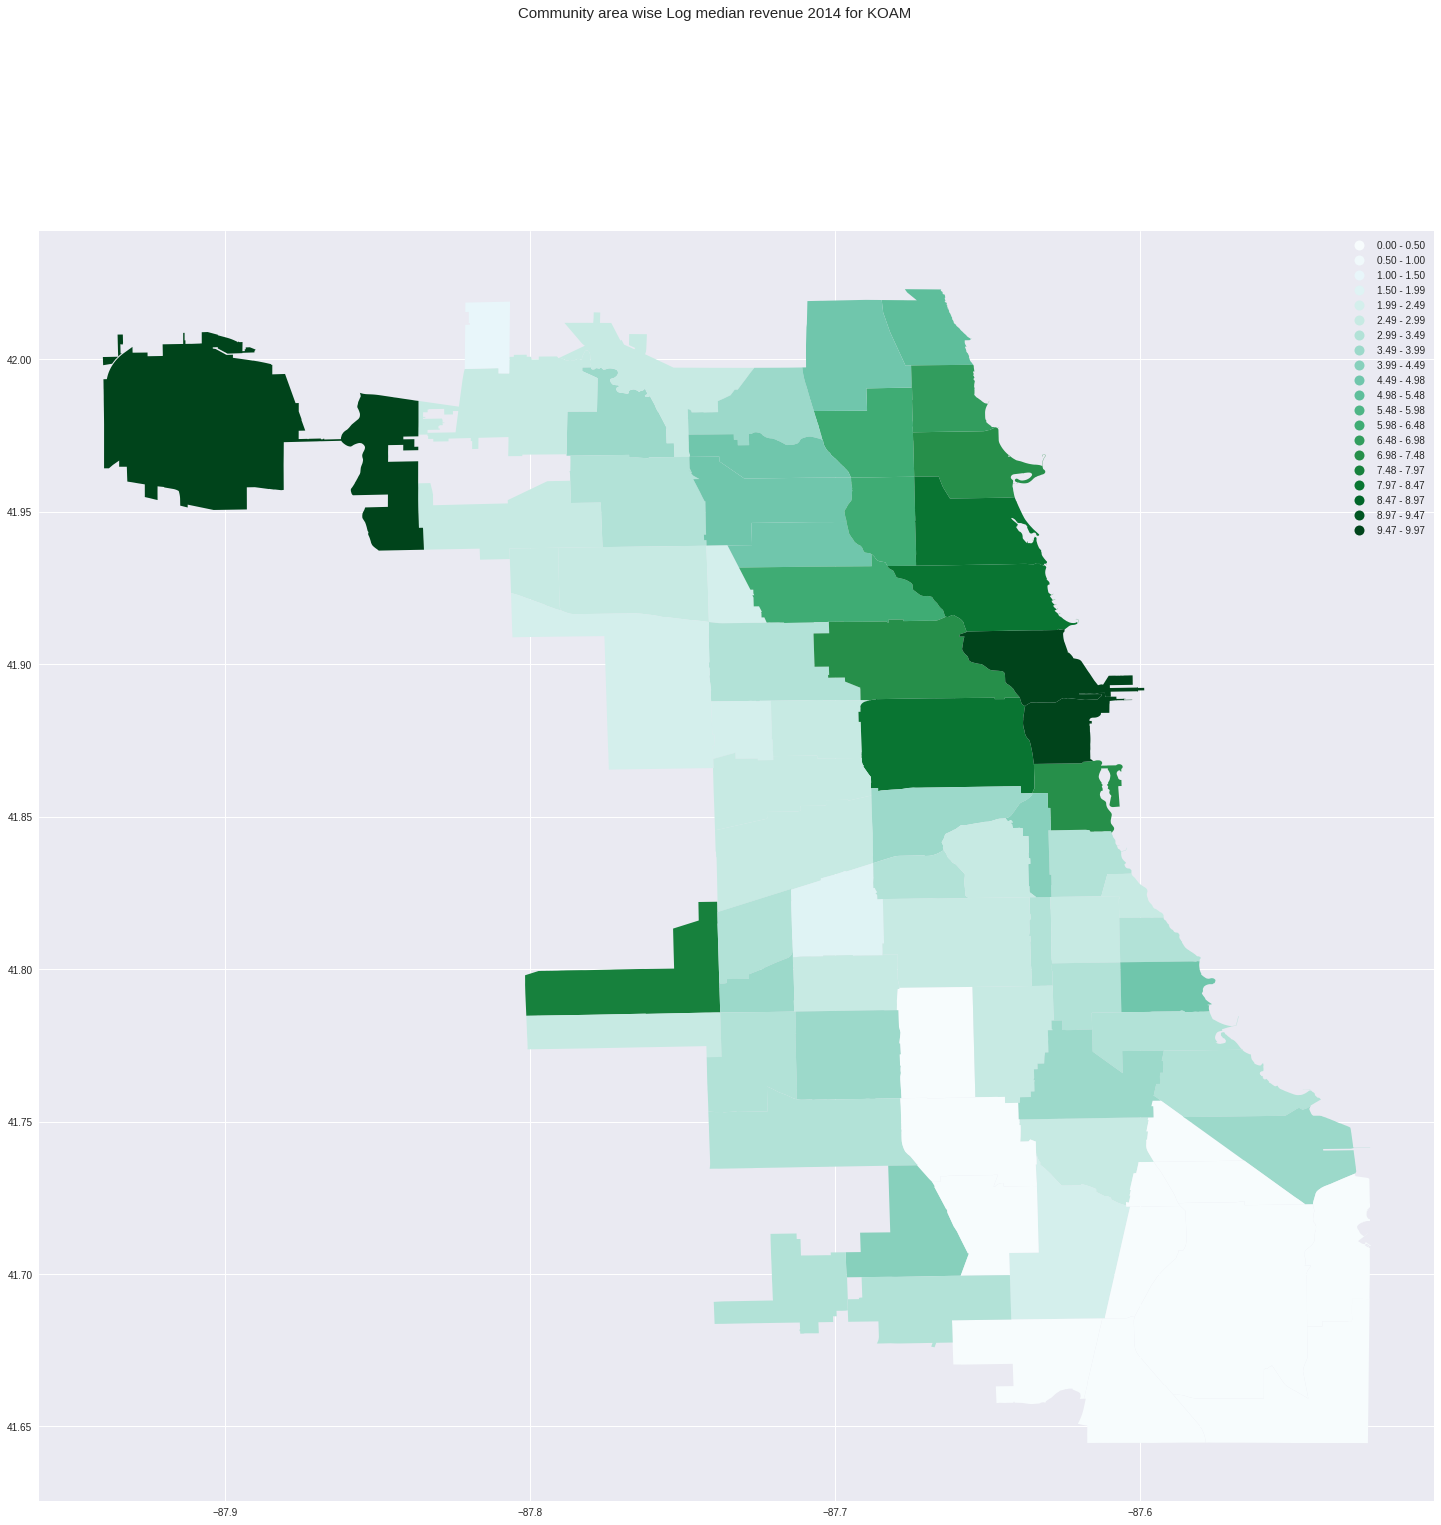

In [0]:
#KOAM community wise median revenue info extraction and map plotting

tas13 = d14.loc[d14['Company'] == 'KOAM Taxi Association']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_sum':np.median})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.name1512808.69	s = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='log_net', scheme='equal_interval', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2014 for KOAM', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('KOAM_14.png', dpi =100)
from google.colab import files
files.download( "KOAM_14.png")

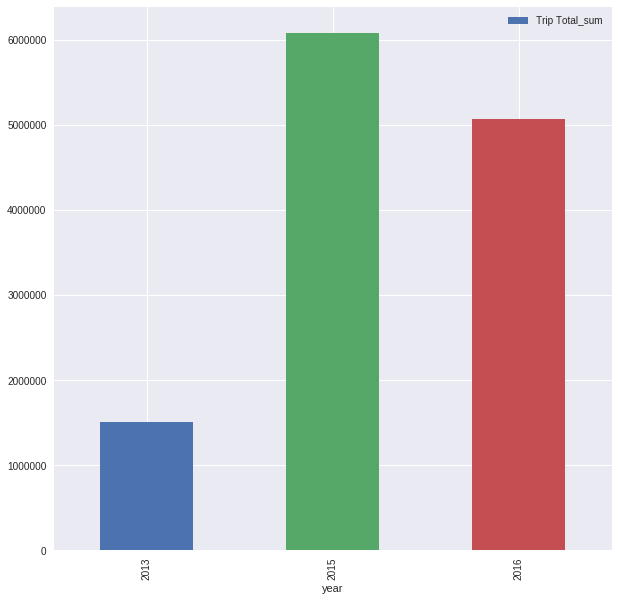

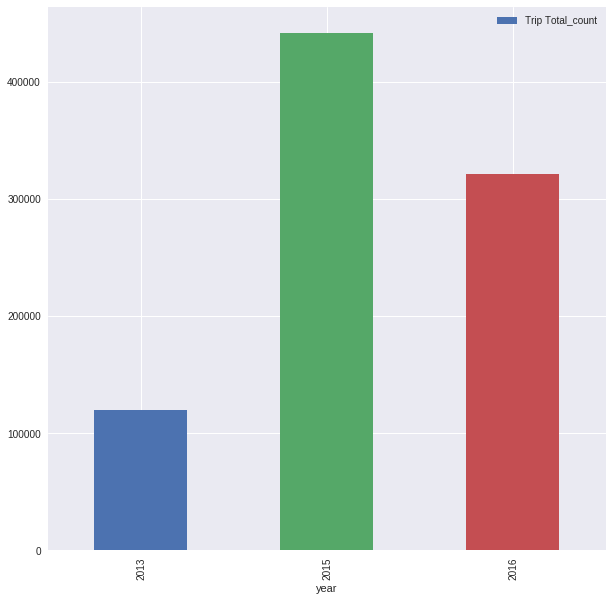

In [0]:
KOAMt = pd.concat([c13.loc[c13['Company'] == 'KOAM Taxi Association'],c15.loc[c15['Company'] == 'KOAM Taxi Association'],c16.loc[c16['Company'] == 'KOAM Taxi Association']])
year = [2013,2015,2016]
KOAMt['year'] = year
KOAMt.plot( 'year', 'Trip Total_sum', kind ='bar', figsize = (10,10))
plt.savefig('KOAM_16.png', dpi =100)
from google.colab import files
files.download( "KOAM_16.png")
#KOAMt.plot( 'year', 'Trip Total_count', kind ='bar', figsize = (10,10))

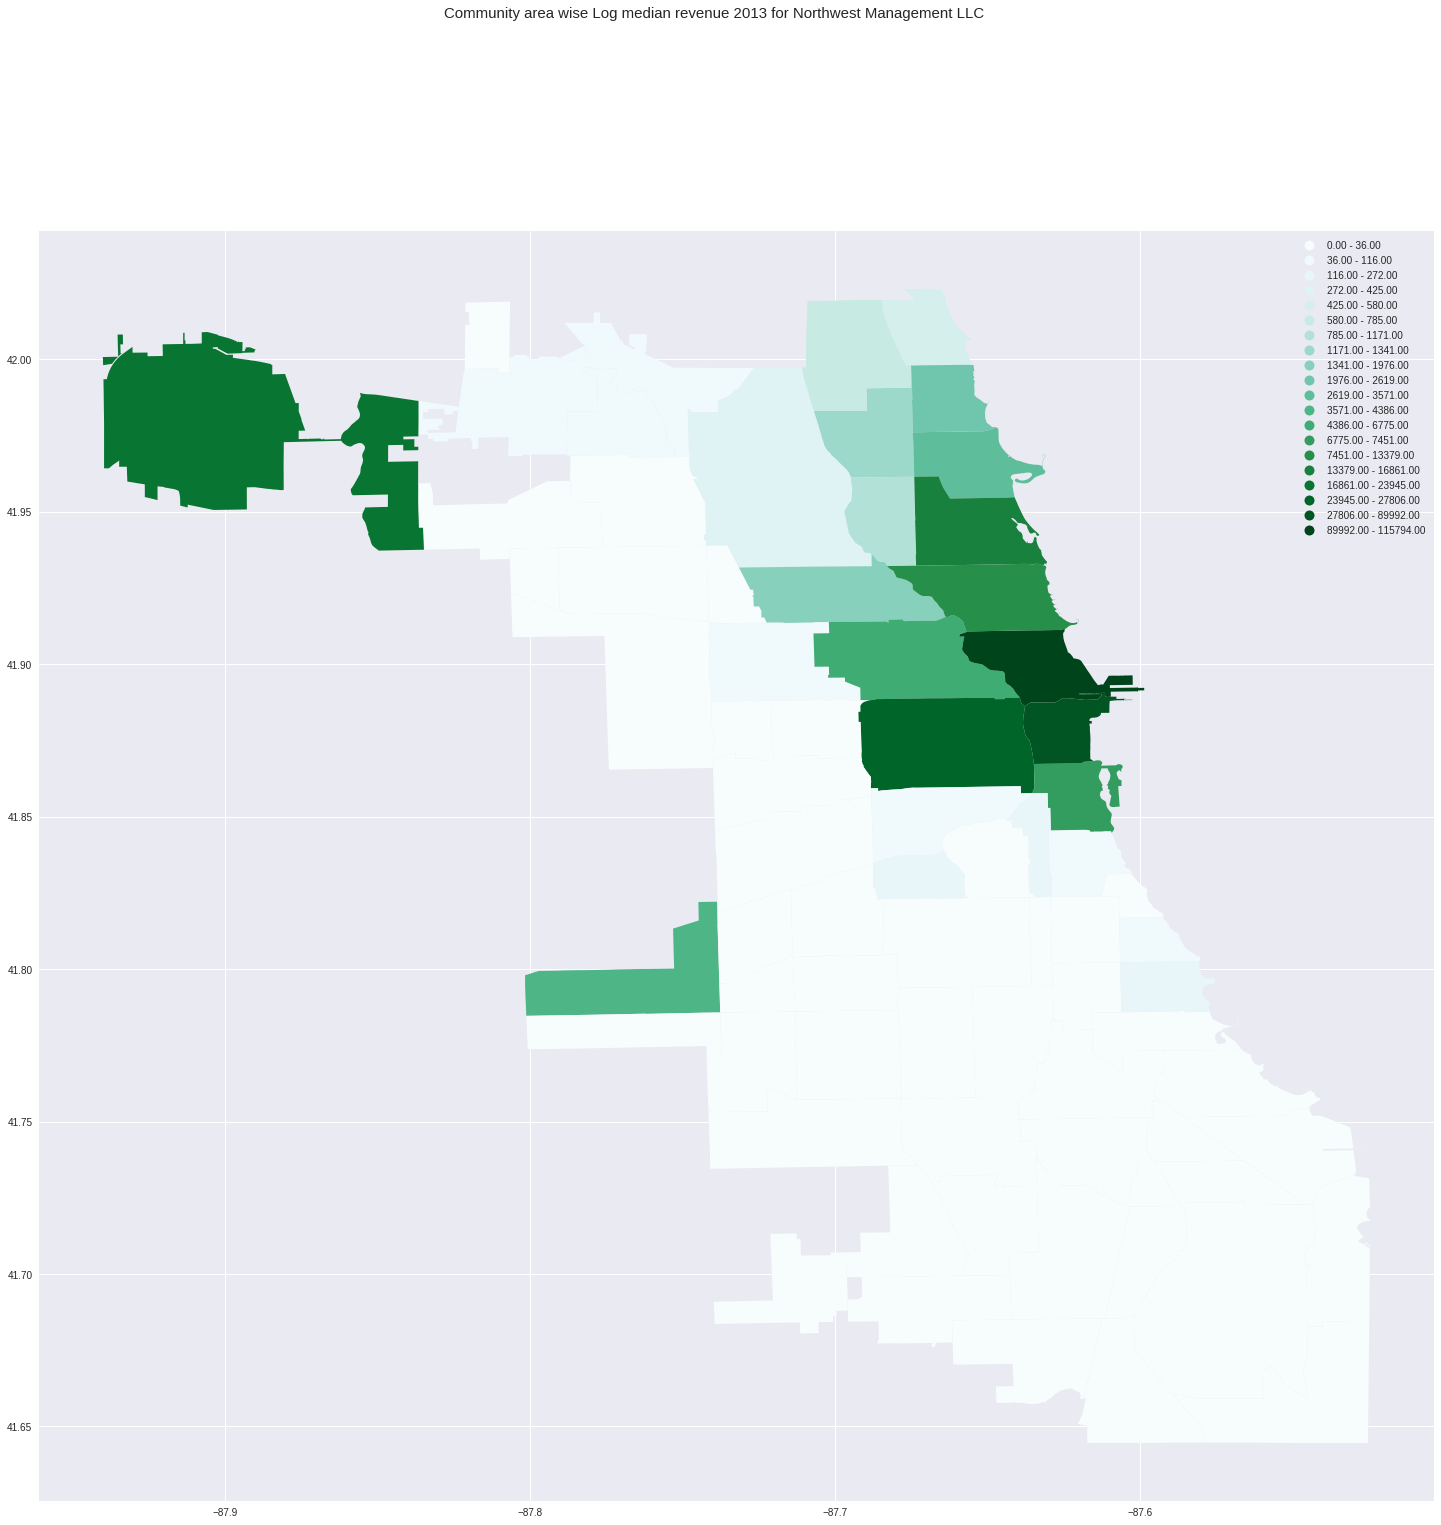

In [0]:
#Days of the week based No of rides in every community area in 2016

tas16 = d16.loc[d16['DayName'] == 'Friday']
tas_com13 = tas13.groupby(['Pickup Community Area']).agg({'Trip Total_count':sum})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
#tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='Trip Total_count', scheme='fisher_jenks', k=20, cmap='BuGn', legend=True)
plt.suptitle('Community area wise Log median revenue 2013 for Northwest Management LLC', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
#plt.savefig('NorthwestManagementLLC_13.png', dpi =100)
#from google.colab import files
#files.download( "NorthwestManagementLLC_13.png")


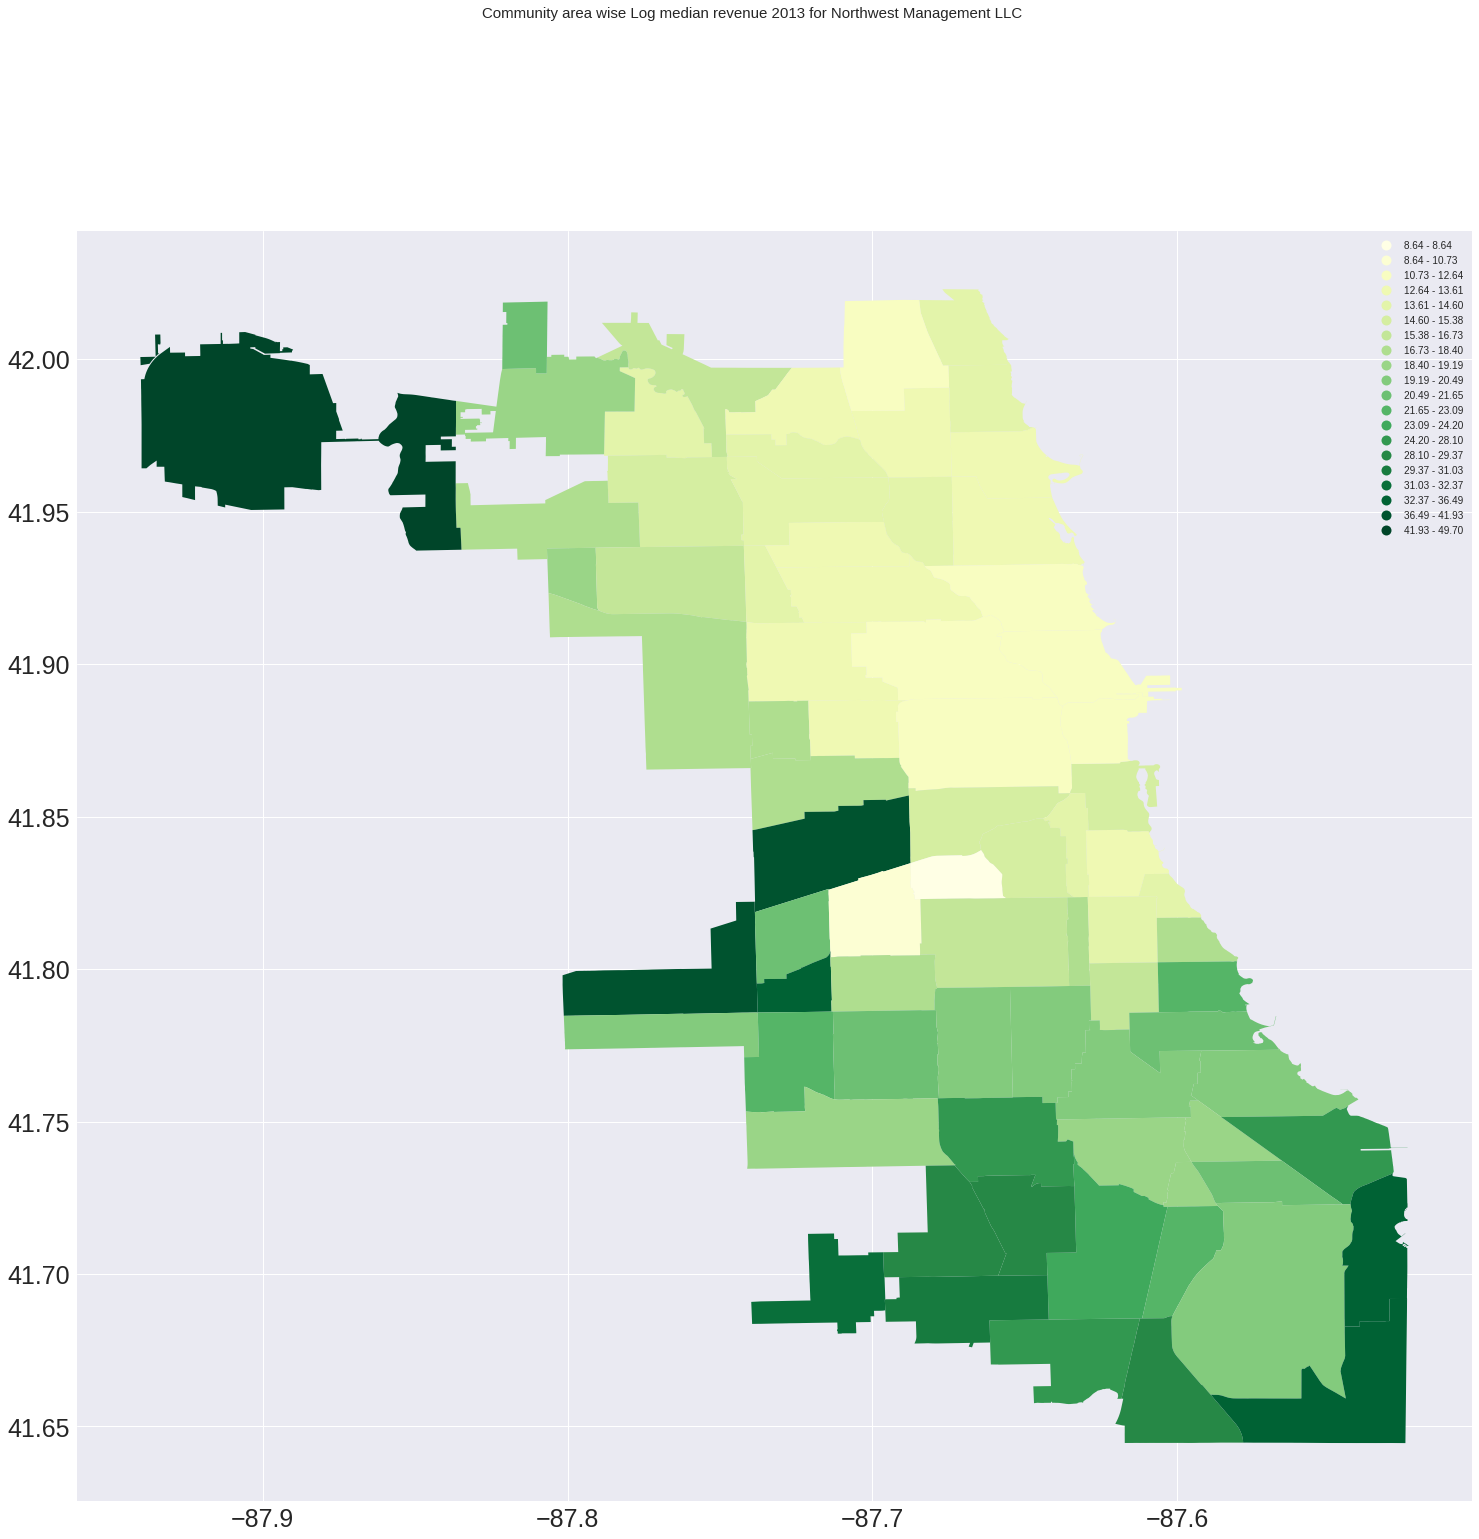

In [0]:

#tas16 = d16.loc[d16['DayName'] == 'Friday']
tas_com13 = d16.groupby(['Pickup Community Area']).agg({'avgfare':np.mean})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
#tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='avgfare', scheme='fisher_jenks', k=20, cmap='YlGn', legend=True).tick_params(axis='both', which='major', labelsize=25)
plt.suptitle('Community area wise Log median revenue 2013 for Northwest Management LLC', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('avgfare16.png', dpi =100)
from google.colab import files
files.download( "avgfare16.png")

In [0]:
d13['avgfare'] = d13['Trip Total_sum']/d13['Trip Total_count']
d14['avgfare'] = d14['Trip Total_sum']/d14['Trip Total_count']
d15['avgfare'] = d15['Trip Total_sum']/d15['Trip Total_count']
d16['avgfare'] = d16['Trip Total_sum']/d16['Trip Total_count']


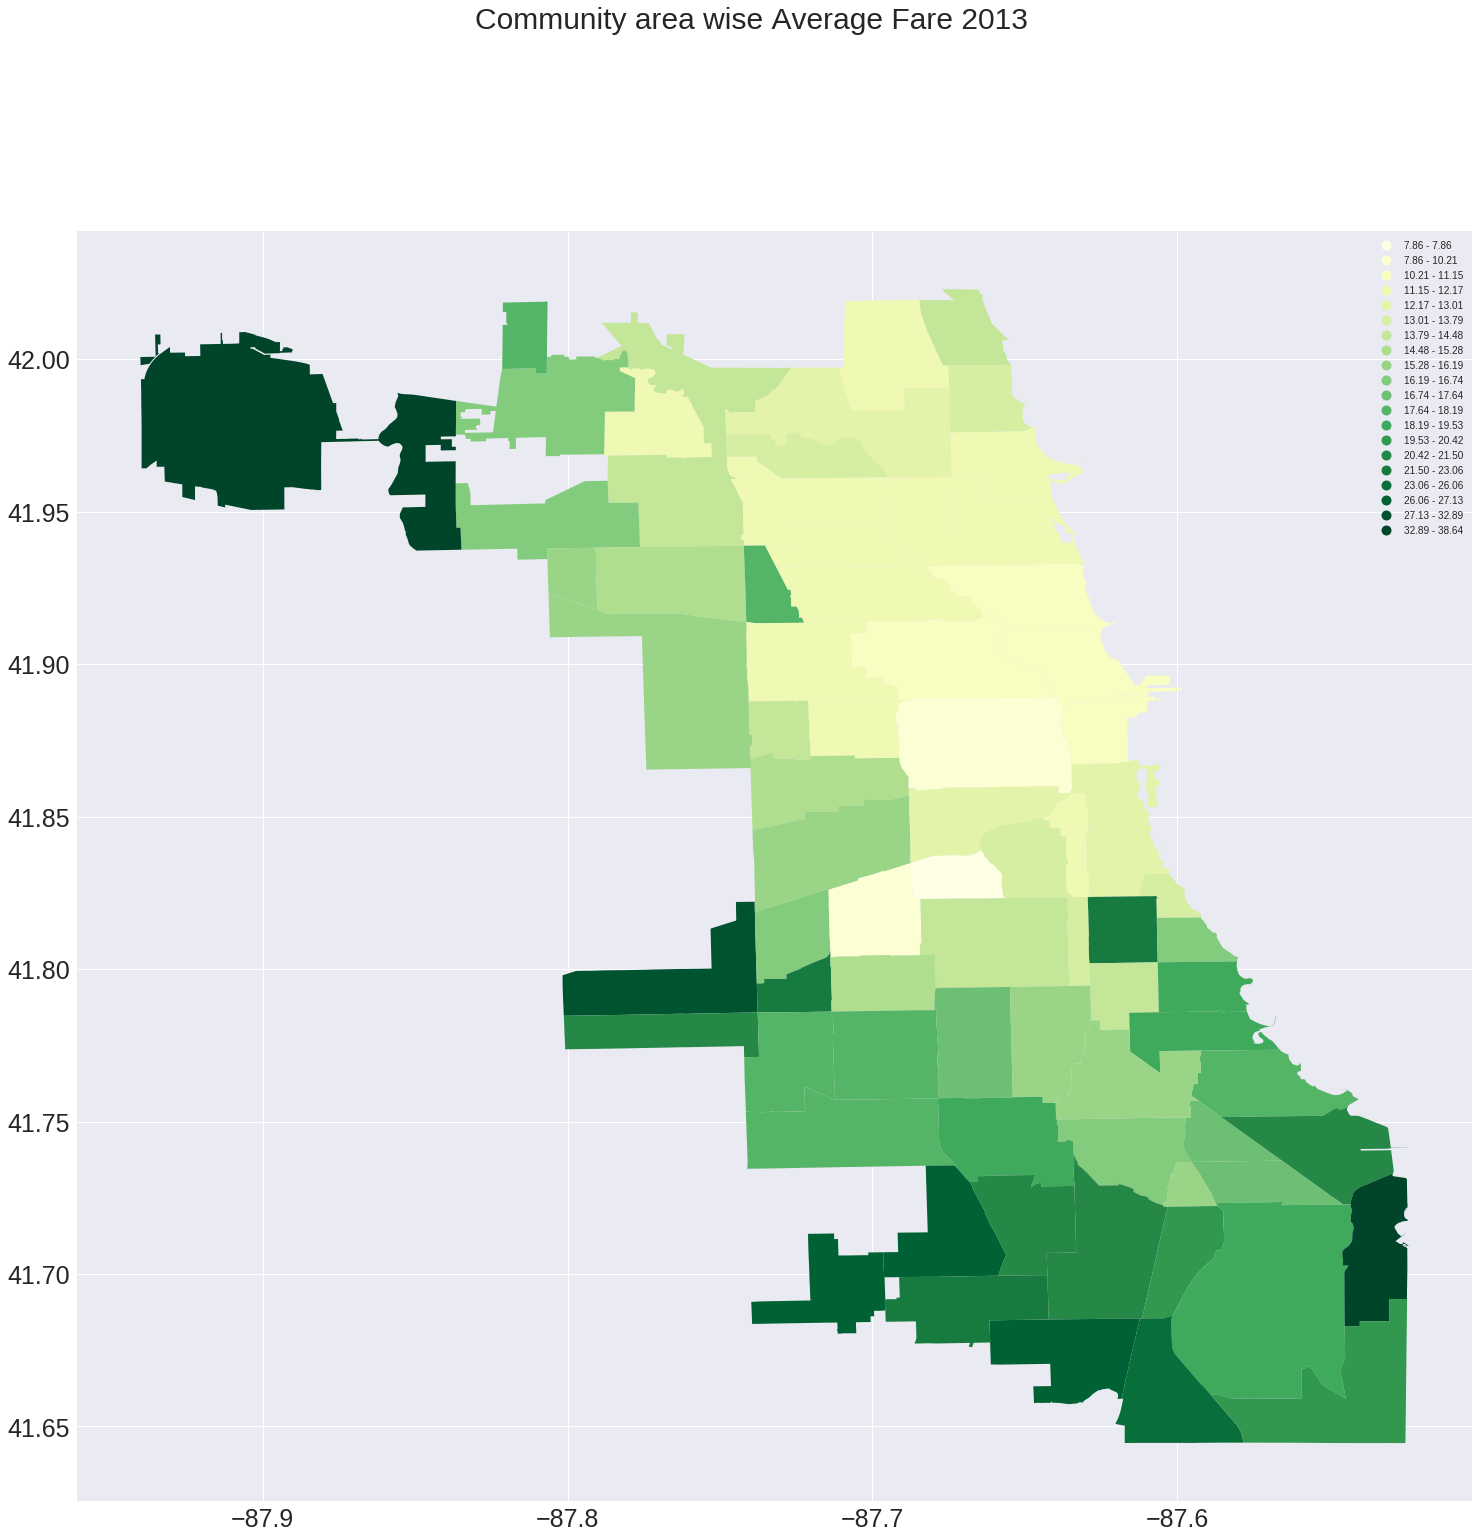

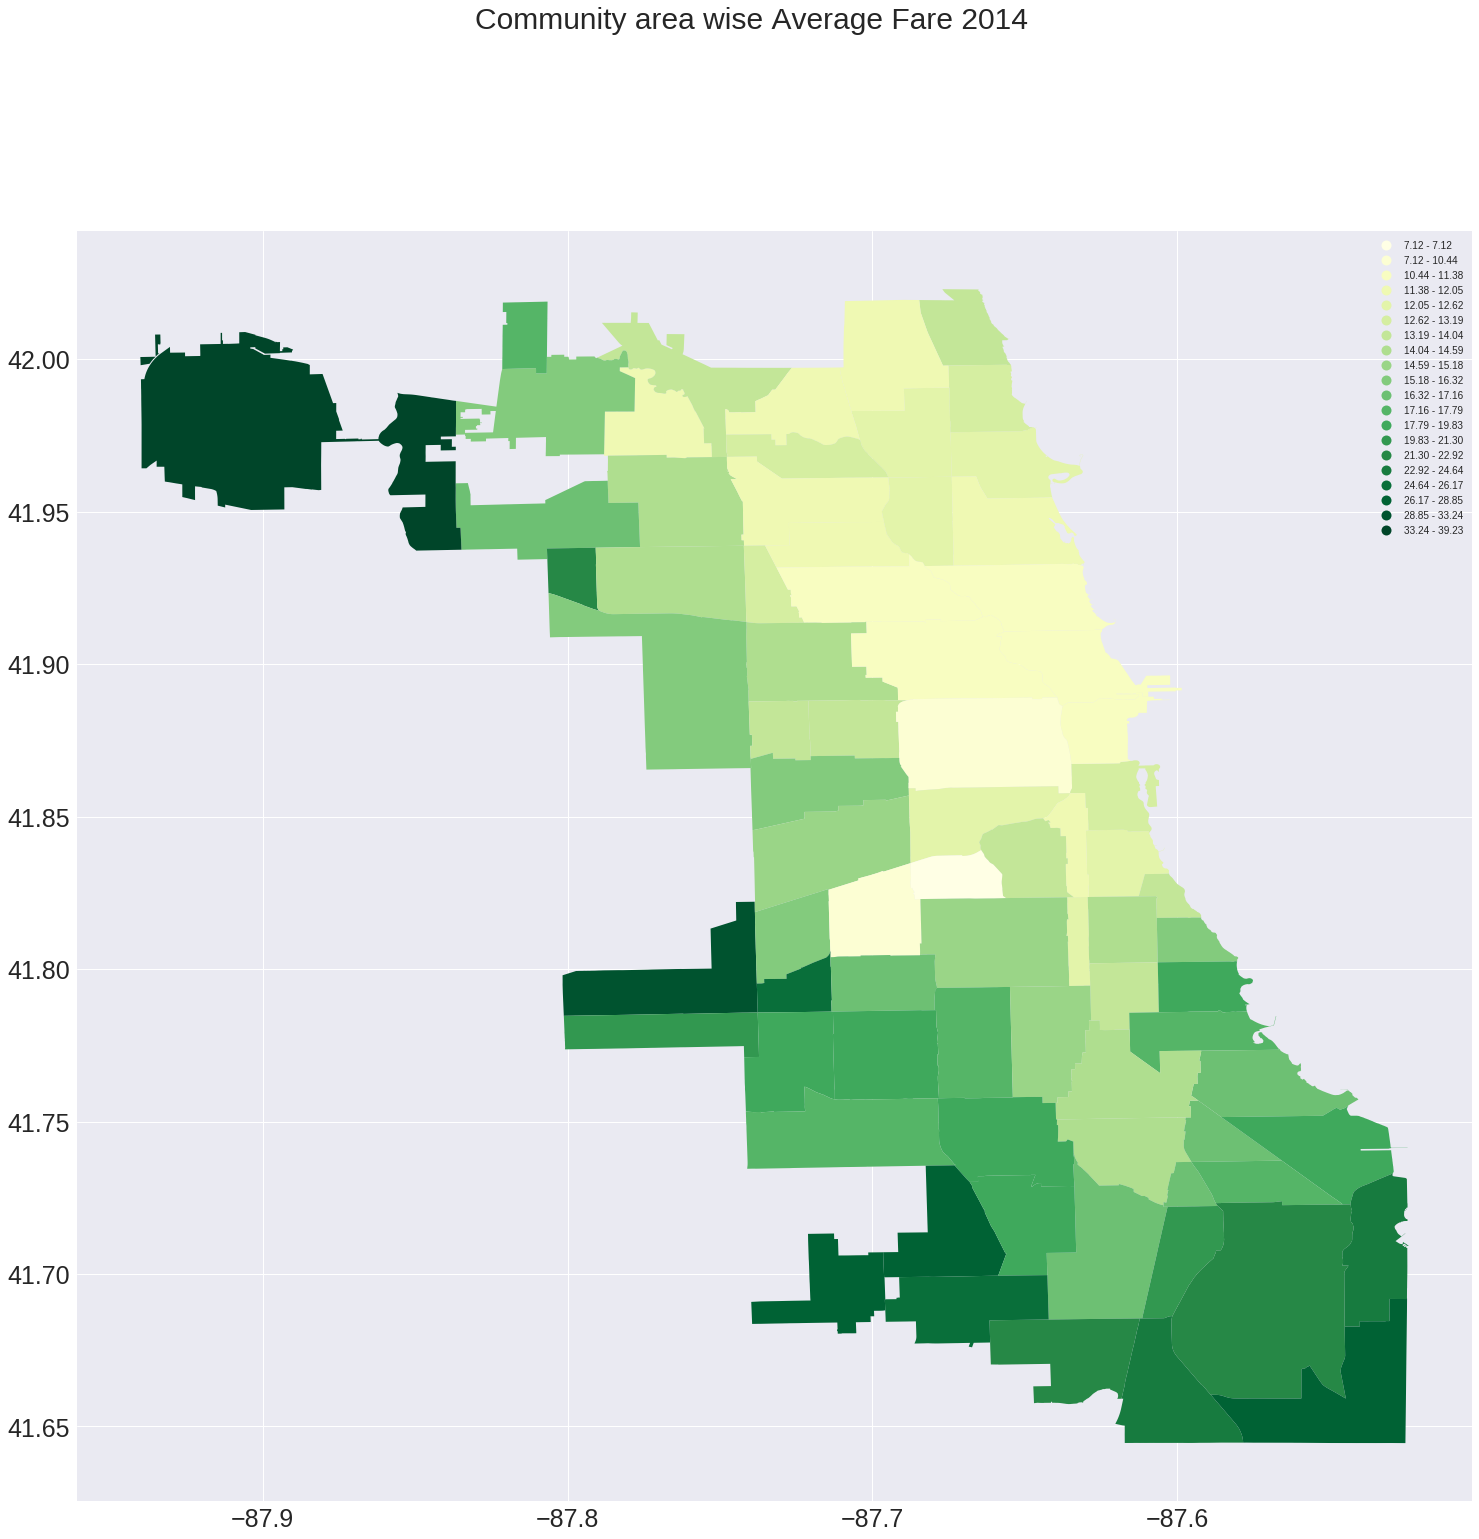

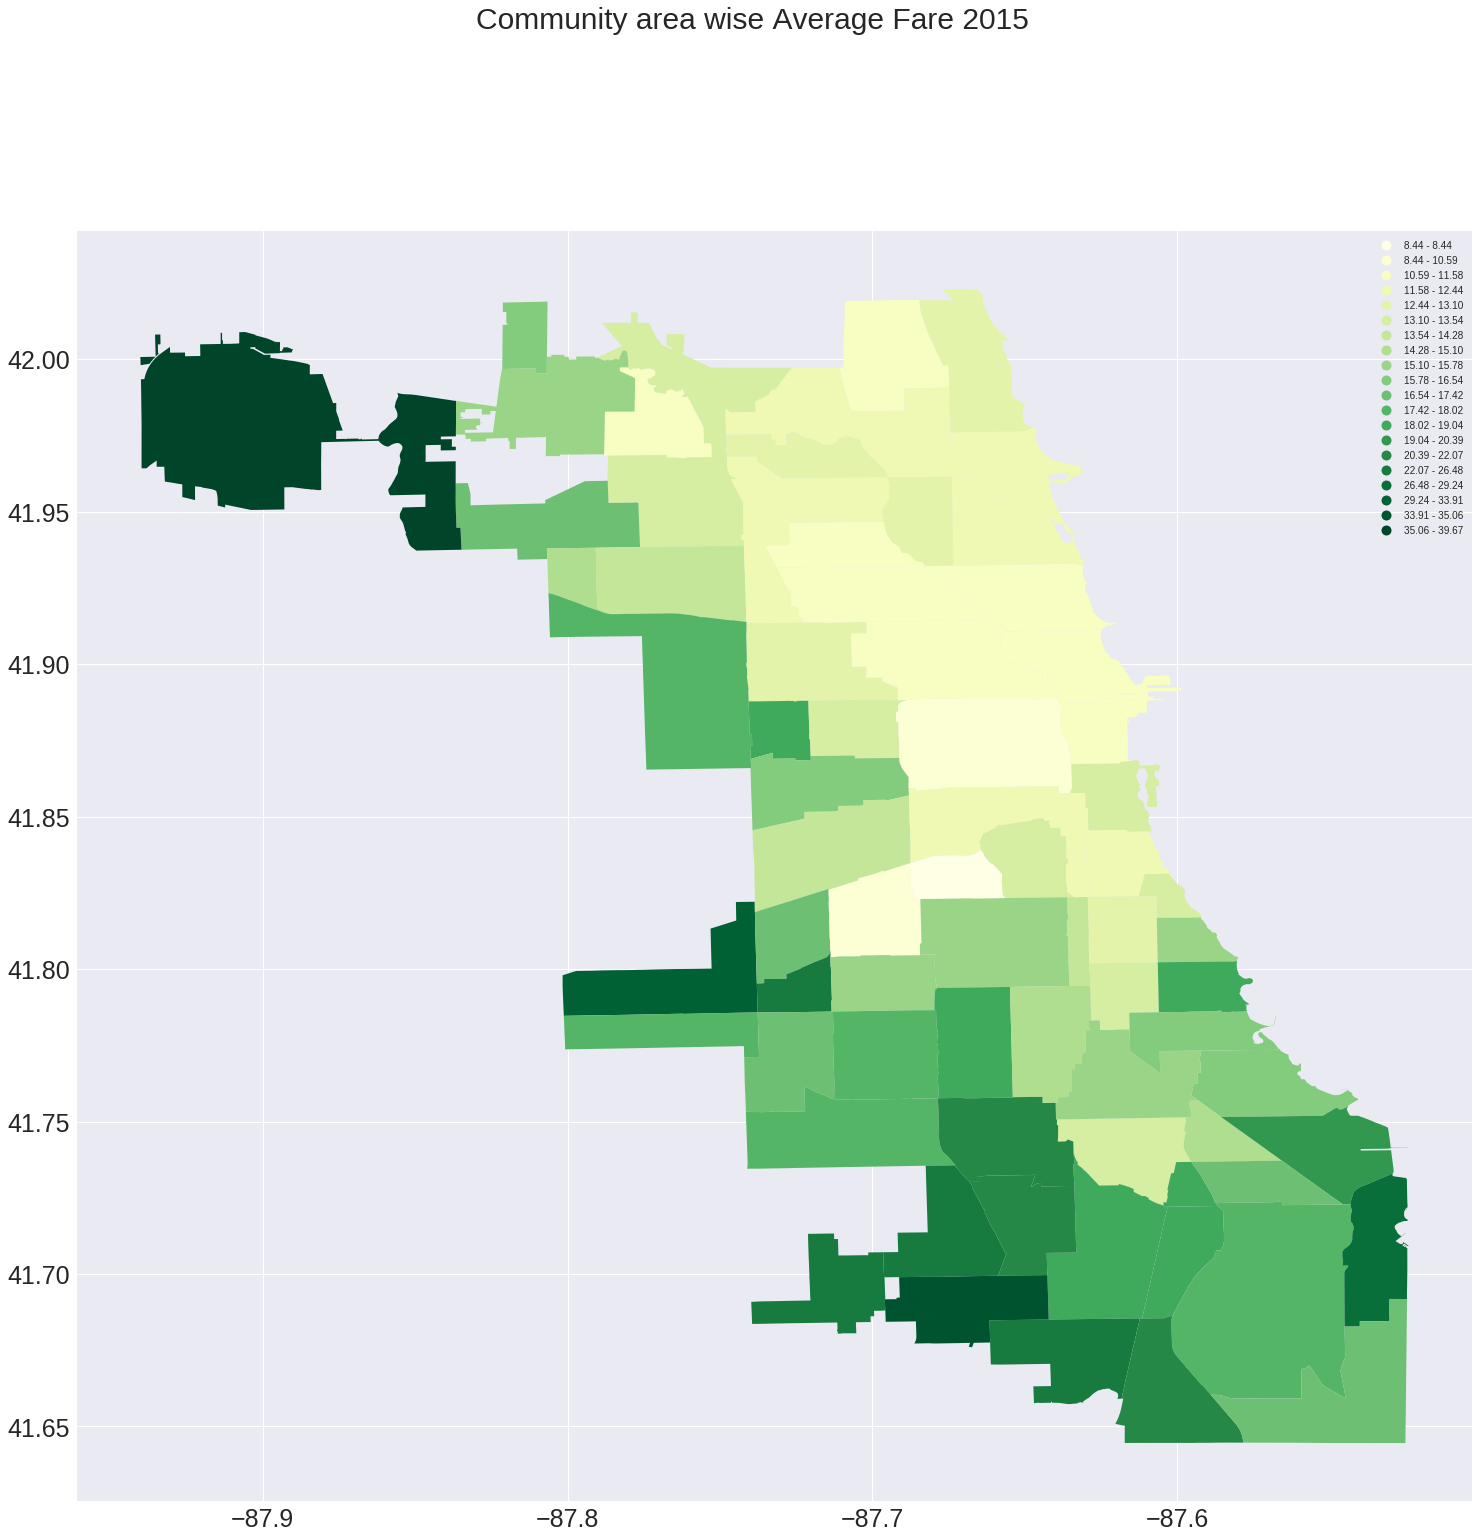

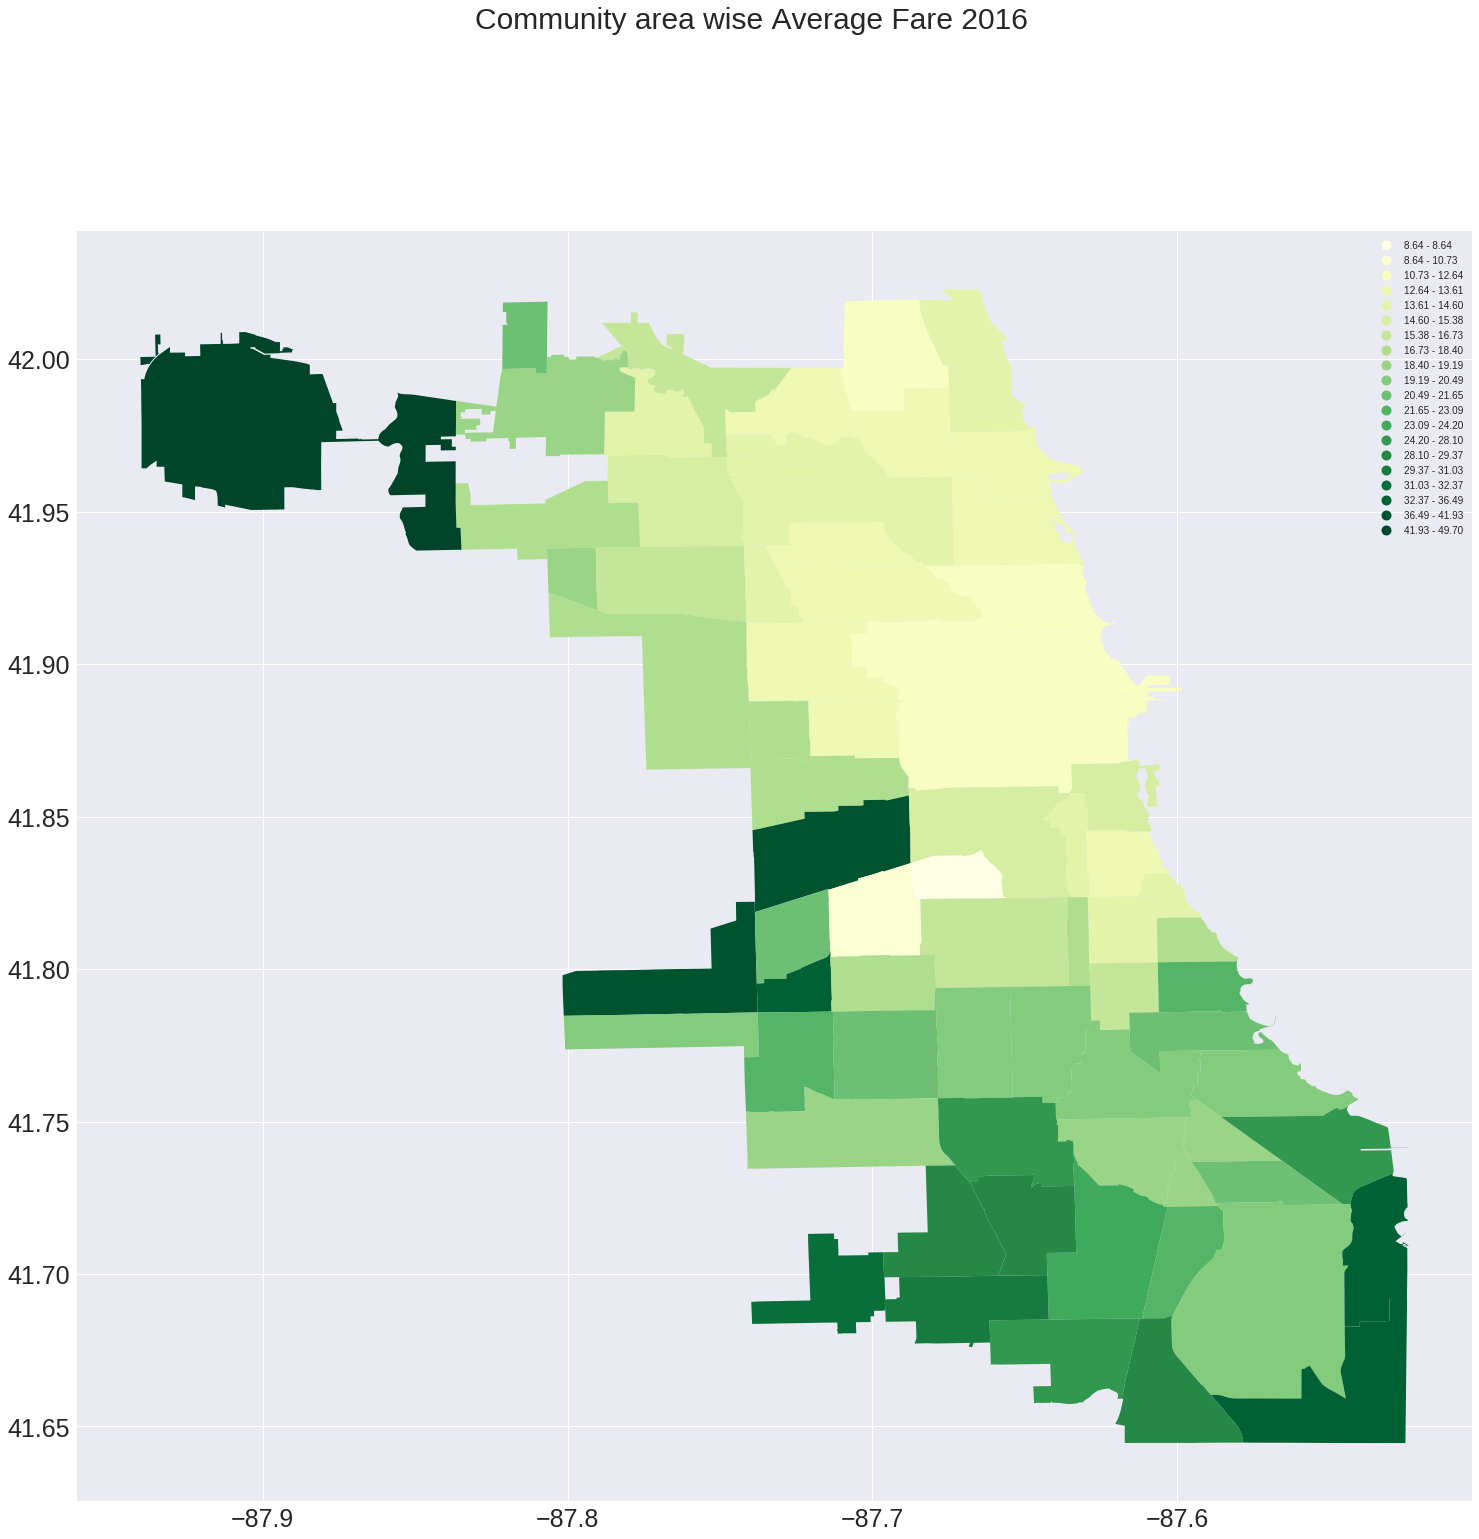

In [0]:
tas_com13 = d13.groupby(['Pickup Community Area']).agg({'avgfare':np.mean})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
#tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='avgfare', scheme='fisher_jenks', k=20, cmap='YlGn', legend=True).tick_params(axis='both', which='major', labelsize=25)
plt.suptitle('Community area wise Average Fare 2013', size=30)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('avgfare13.png', dpi =100)
from google.colab import files
files.download( "avgfare13.png")

tas_com13 = d14.groupby(['Pickup Community Area']).agg({'avgfare':np.mean})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
#tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='avgfare', scheme='fisher_jenks', k=20, cmap='YlGn', legend=True).tick_params(axis='both', which='major', labelsize=25)
plt.suptitle('Community area wise Average Fare 2014', size=30)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('avgfare14.png', dpi =100)
from google.colab import files
files.download( "avgfare14.png")

tas_com13 = d15.groupby(['Pickup Community Area']).agg({'avgfare':np.mean})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
#tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='avgfare', scheme='fisher_jenks', k=20, cmap='YlGn', legend=True).tick_params(axis='both', which='major', labelsize=25)
plt.suptitle('Community area wise Average Fare 2015', size=30)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('avgfare15.png', dpi =100)
from google.colab import files
files.download( "avgfare15.png")

tas_com13 = d16.groupby(['Pickup Community Area']).agg({'avgfare':np.mean})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
#tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='avgfare', scheme='fisher_jenks', k=20, cmap='YlGn', legend=True).tick_params(axis='both', which='major', labelsize=25)
plt.suptitle('Community area wise Average Fare 2016', size=30)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('avgfare16.png', dpi =100)
from google.colab import files
files.download( "avgfare16.png")

In [0]:
downloaded = drive.CreateFile({'id':'10jRZGv5REwsOwDnlUNZH8kfWlbfhAQq6'}) 
downloaded.GetContentFile('Data_14.csv') 
d14 = pd.read_csv('Data_14.csv')

In [0]:
tas_com13 = d14.groupby(['Pickup Community Area']).agg({'avgfare':np.mean})
tas_com13.columns = ["".join(x) for x in tas_com13.columns.ravel()]
tas_com13.index.names = ['area_num_1']
tas_com13 = tas_com13.reset_index()
tas_com13.area_num_1 = tas_com13.area_num_1.astype(int)
ca = gpd.read_file('com.geojson')
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)
tas13_merge = ca.merge(tas_com13, on='area_num_1', how='left')
tas13_merge.fillna(value = 0, inplace=True)
#tas13_merge['log_net'] = np.log(tas13_merge['Trip Total_sum']+1) 
tas13_merge.plot(column='avgfare', scheme='fisher_jenks', k=20, cmap='YlGn', legend=True).tick_params(axis='both', which='major', labelsize=25)
plt.suptitle('Community area wise Average Fare 2016', size=30)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('avgfare16.png', dpi =100)
from google.colab import files
files.download( "avgfare16.png")